Source: https://www.kaggle.com/kabure/kickstarter-projects-eda-stat-tests-pipeline

In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import plotly
import plotly.tools as tls
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

import warnings
from collections import Counter

%load_ext autoreload
%autoreload 2

In [2]:
ks = pd.read_csv('../../../datasets/ks-projects-201801.csv')
ks = ks.sample(1000, random_state=42).reset_index().drop('index', axis=1)

In [3]:
from utils import *
resumetable(ks)

Dataset Shape: (1000, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,ID,int64,0,1000,1576537356,675907016,361890770,9.97
1,name,object,0,1000,Deko,"Westside BJ's: The Gluten-Free, Organic Food T...",Crepe Diem Food Truck,9.97
2,category,object,0,119,Hardware,Food Trucks,Food,6.12
3,main_category,object,0,15,Technology,Food,Food,3.53
4,currency,object,0,11,USD,USD,USD,1.20
5,deadline,object,0,819,2015-10-24,2015-02-01,2014-01-17,9.59
6,goal,float64,0,203,70000,250000,30000,6.12
7,launched,object,0,1000,2015-09-24 03:12:52,2015-01-02 20:55:07,2013-12-18 03:26:04,9.97
8,pledged,float64,0,645,1888,1466,5723,8.14
9,state,object,0,6,failed,failed,failed,1.53


In [4]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1576537356,Deko,Hardware,Technology,USD,2015-10-24,70000.0,2015-09-24 03:12:52,1888.0,failed,41,US,1888.00,1888.00,70000.00
1,675907016,"Westside BJ's: The Gluten-Free, Organic Food T...",Food Trucks,Food,USD,2015-02-01,250000.0,2015-01-02 20:55:07,1466.0,failed,9,US,1466.00,1466.00,250000.00
2,361890770,Crepe Diem Food Truck,Food,Food,USD,2014-01-17,30000.0,2013-12-18 03:26:04,5723.0,failed,90,US,5723.00,5723.00,30000.00
3,1225211551,Season's End - A horror novel ready for public...,Fiction,Publishing,GBP,2016-11-23,5500.0,2016-10-24 15:44:36,25.0,failed,2,GB,23.24,31.09,6839.01
4,2122944289,Colorado City Arizona Restaurant (Canceled),Restaurants,Food,USD,2015-05-13,30000.0,2015-03-14 05:18:34,100.0,canceled,3,US,100.00,100.00,30000.00


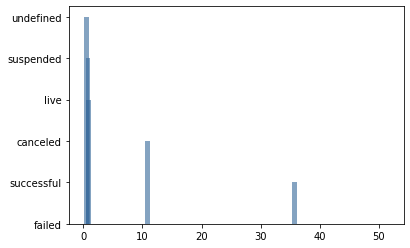

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

state = round(ks["state"].value_counts() / len(ks["state"]) * 100, 2)
labels = list(state.index)
values = list(state.values)

plt.bar(values, labels, color=(0.2, 0.4, 0.6, 0.6))
plt.show()

In [21]:
ks.groupby('state')['ID'].count()

state
canceled      109
failed        512
live            9
successful    357
suspended       8
undefined       5
Name: ID, dtype: int64

In [22]:
ks = ks.loc[ks['state'].isin(['failed','successful'])]

In [24]:
ks.groupby('state')['ID'].count()

state
failed        512
successful    357
Name: ID, dtype: int64

In [26]:
ks_failed = ks[ks.state == 'failed']
ks_successful = ks[ks.state == 'successful']

print(ks_failed.shape)
print(ks_successful.shape)

(512, 15)
(357, 15)


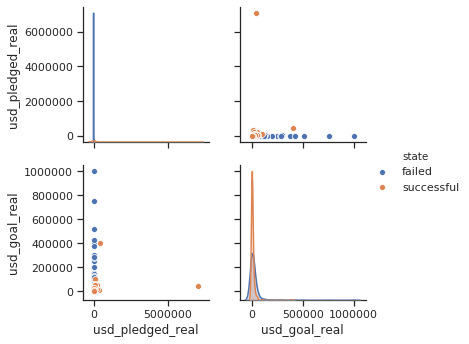

In [30]:
import seaborn as sns
sns.set(style='ticks')

sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')

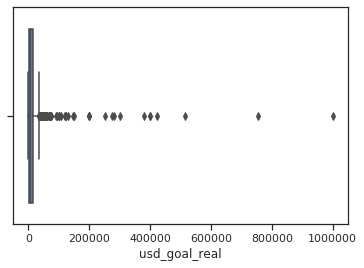

In [31]:
sns.boxplot(x=ks.usd_goal_real)

In [33]:
Q1 = ks.usd_goal_real.quantile(0.25)
Q3 = ks.usd_goal_real.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ks = ks[ks.usd_goal_real < IQR]

13000.0


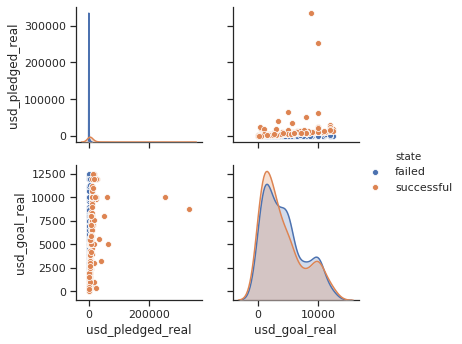

In [34]:
sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')

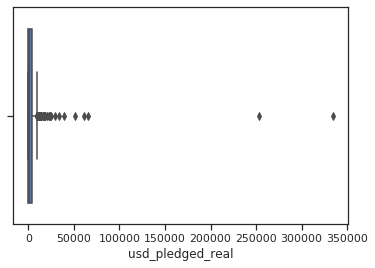

In [35]:
sns.boxplot(x=ks.usd_pledged_real)

In [36]:
Q1 = ks.usd_pledged_real.quantile(0.25)
Q3 = ks.usd_pledged_real.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ks = ks[ks.usd_pledged_real < IQR]

3671.7275


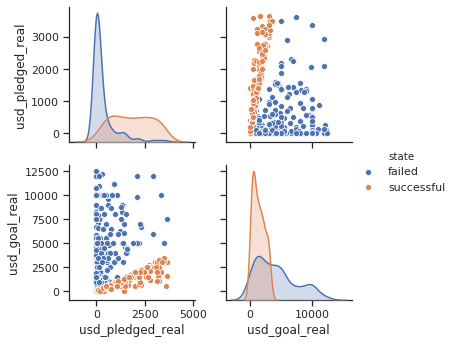

In [37]:
sns.pairplot(ks[['usd_pledged_real', 'usd_goal_real', 'state']], hue='state')